In [24]:
%config IPCompleter.greedy=True
%matplotlib inline

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [26]:
titanic = pd.read_csv('Datasets/Titanic/train.csv')
test_set = pd.read_csv('Datasets/Titanic/test.csv')
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [27]:
from sklearn.base import TransformerMixin

class MixedImputer(TransformerMixin):
    
    def __init__(self):
        pass


    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
                                  if X[c].dtype == np.dtype('O')
                                      else X[c].mean() for c in X],
                              index=X.columns)
        return self


    def transform(self, X):
        return X.fillna(self.fill)


mximputer = MixedImputer()
titanic = mximputer.fit_transform(titanic)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [64]:
titanic.describe()

PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    1.691358    0.647587   29.699118   
std     257.353842    0.486592    0.836071    0.477990   13.002015   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    1.000000    0.000000   22.000000   
50%     446.000000    0.000000    1.000000    1.000000   29.699118   
75%     668.500000    1.000000    2.000000    1.000000   35.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare      110152      110413     ...      \
count  891.000000  891.000000  891.000000  891.000000  891.000000     ...       
mean     0.523008    0.381594   32.204208    0.003367    0.003367     ...       
std      1.102743    0.806057   49.693429    0.057961    0.057961     ...       
min      0.000000    0.000000    0.000000    0.000000    0.000000     ...       
25%      0.000000    0.000000    7.910400    0.000000    0.000000     ...       
50%      0.000000    0.000000   14.454200    0.000000    0.000000     ...       
75%      1.000000    0.000000   31.000000    0.000000    0.000000     ...       
max      8.000000    6.000000  512.329200    1.000000    1.000000     ...       

            F G73          F2         F33         F38          F4          G6  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.002245    0.003367    0.003367    0.001122    0.002245    0.004489   
std      0.047351    0.057961    0.057961    0.033501    0.047351    0.066890   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                T           C           Q           S  
count  891.000000  891.000000  891.000000  891.000000  
mean     0.001122    0.188552    0.086420    0.725028  
std      0.033501    0.391372    0.281141    0.446751  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    1.000000  
75%      0.000000    0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 839 columns]

In [29]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

def reverse_class_rank(dataset, label):
    X = dataset.copy()
    n_classes = len(X[label].value_counts())
    X[label] = X[label].apply(lambda c: n_classes-c+1)
    return X


sexencoder = LabelEncoder()
titanic['Sex'] = sexencoder.fit_transform(titanic['Sex'])
print(sexencoder.classes_)

titanic_b = titanic.drop(['Ticket', 'Cabin', 'Embarked'], axis=1)

ticket_binarizer = LabelBinarizer()
ticket_binarized = ticket_binarizer.fit_transform(titanic['Ticket'])
ticket_df = pd.DataFrame(ticket_binarized, columns=ticket_binarizer.classes_)
titanic_b = pd.concat([titanic_b, ticket_df], axis=1)

cabin_binarizer = LabelBinarizer()
cabin_binarized = cabin_binarizer.fit_transform(titanic['Cabin'])
cabin_df = pd.DataFrame(cabin_binarized, columns=cabin_binarizer.classes_)
titanic_b = pd.concat([titanic_b, cabin_df], axis=1)

embarked_binarizer = LabelBinarizer()
embarked_binarized = embarked_binarizer.fit_transform(titanic['Embarked'])
embarked_df = pd.DataFrame(embarked_binarized, columns=embarked_binarizer.classes_)
titanic_b = pd.concat([titanic_b, embarked_df], axis=1)

titanic = reverse_class_rank(titanic_b, 'Pclass')
titanic.info()

['female' 'male']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 840 entries, PassengerId to S
dtypes: float64(2), int64(837), object(1)
memory usage: 5.7+ MB


In [30]:
corr_matrix = titanic.corr()
survived_corrs = corr_matrix['Survived'].sort_values(ascending=False)
selected_fts = list(survived_corrs.index[:20])+list(survived_corrs.index[-20:])
selected_fts

['Survived',
 'Pclass',
 'Fare',
 'C',
 '113760',
 '2666',
 'Parch',
 'PC 17572',
 'PC 17755',
 '24160',
 '13502',
 '110152',
 'F33',
 'E101',
 '29106',
 '347742',
 '1601',
 'PP 9549',
 'PC 17569',
 '2651',
 '244252',
 '239865',
 '2678',
 '7534',
 '345773',
 '239853',
 '4133',
 '349909',
 'W./C. 6608',
 '382652',
 'S.O.C. 14879',
 '347088',
 '3101295',
 'CA 2144',
 'Age',
 '347082',
 'CA. 2343',
 'S',
 'B96 B98',
 'Sex']

In [31]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()
train_set = titanic[selected_fts]
X_train = mmscaler.fit_transform(train_set.drop('Survived', axis=1))
y_train = train_set['Survived']

In [70]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

sgd = SGDClassifier(random_state=999)
sgd_preds = cross_val_predict(sgd, X_train, y_train, cv=5)
sgd_cfmx = confusion_matrix(y_train, sgd_preds)
sgd_acc = accuracy_score(y_train, sgd_preds)
sgd_precision = precision_score(y_train, sgd_preds)
print(sgd_cfmx)
print(sgd_acc, sgd_precision)

rfc = RandomForestClassifier(random_state=1)
rfc_preds = cross_val_predict(rfc, X_train, y_train, cv=5)
rfc_cfmx = confusion_matrix(y_train, rfc_preds)
rfc_acc = accuracy_score(y_train, rfc_preds)
rfc_precision = precision_score(y_train, rfc_preds)
print(rfc_cfmx)
print(rfc_acc, rfc_precision)

[[450  99]
 [ 90 252]]
0.787878787879 0.717948717949
[[475  74]
 [ 99 243]]
0.805836139169 0.766561514196


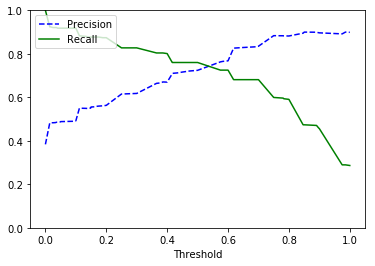

In [81]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_vs_threshold(p, r, t):
    plt.plot(t, p[:-1], 'b--', label='Precision')
    plt.plot(t, r[:-1], 'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0, 1])


rfc_scores = cross_val_predict(RandomForestClassifier(), X_train, y_train, cv=5, method='predict_proba')
rfc_precisions, rfc_recalls, rfc_thresholds = precision_recall_curve(y_train, rfc_scores[:, 1])
plot_precision_recall_vs_threshold(rfc_precisions, rfc_recalls, rfc_thresholds)
plt.show()